## Первичный анализ данных в Python 2: Практика
### Темы:
#### 1. Операции объединения данных
#### 2. Аггрегирование данных
#### 3. Визуализация данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!wget https://www.dropbox.com/s/rykuoongm15y56u/Placement_Data_Full_Class.csv

df = pd.read_csv('./Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Самое время применить знания с прошлого занятия!

In [ ]:
# sample
df.sample(n=4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
89,90,F,84.0,Others,75.0,Others,Science,69.0,Sci&Tech,Yes,62.00,Mkt&HR,62.36,Placed,210000.0
12,13,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
118,119,M,76.0,Central,80.0,Central,Science,78.0,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed,276000.0
32,33,F,61.0,Central,81.0,Central,Commerce,66.4,Comm&Mgmt,No,50.89,Mkt&HR,62.21,Placed,278000.0


In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
# describe
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


---

## Операции объединения данных

### Для демонстрации давайте разделим наш датасет на части

In [ ]:
#хотим посмотреть размер датасета
# как сделать?
df.shape

(215, 15)

In [ ]:
df_sub = df[['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex']][:11]

In [ ]:
df_sub

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No


In [ ]:
# По столбцам
df1_col = df_sub[['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_s']]
df2_col = df_sub[['hsc_b','degree_p','degree_t','workex']]

In [ ]:
df1_col

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science
4,5,M,85.80,Central,73.60,Commerce
5,6,M,55.00,Others,49.80,Science
6,7,F,46.00,Others,49.20,Commerce
7,8,M,82.00,Central,64.00,Science
8,9,M,73.00,Central,79.00,Commerce
9,10,M,58.00,Central,70.00,Commerce


In [ ]:
# По строкам
df1_row = df_sub.loc[:5] # df_sub.iloc[:6]
df2_row = df_sub.loc[6:] #df_sub.iloc[6:]

In [ ]:
# По столбцам, но в обе таблицы добавим столбце-id
df.reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
# отберем данные необходимые для примера
df1 = df_sub[['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_s']][:6]
df2 = df_sub[['hsc_b','degree_p','degree_t','workex']][4:]

Объединение таблиц в Pandas: merge, join и concatenate



[Руководство по методам pd.merge, pd.join и pd.concat](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [ ]:
# join (по индексу)

Из трех операций объединения датафреймов join является наиболее простым и предлагает минимум «средств управления» объединения ваших таблиц. Он объединит все столбцы из двух таблиц с общими столбцами.

Вообще говоря, существует 4 типа соединений
* внутреннее соединение (inner)
* левое соединение (left), так остаются строки из левой таблицы, а для неизвестных значений правой выставляется значение NaN
* правое соеденине (т.е right) так остаются строки из правой таблицы, а для неизвестных значений левой выставляется значение NaN
* внешнее соединение (т.е outer). кобминация из левого и правого соединения


Для запоминания можно вспоользовать вот этой картинкой. Нужно подчеркнуть, что пересечение и объединение происходит в множестве ключей (колонок), по которым происходит соединение. Так, например, для inner join мы оставляем в результирующей выборке подмножество всевозможных попарных комбинаций строк, с условием, что значения в колонках (ключах) по которым происходит соединение, совпадают.

**Типы соединений**
<img src='./join-types-merge-names.jpg'/>

In [ ]:
# join (по индексу)

In [ ]:
df1.join(df2) # df1.join(df2, how='left') 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
0,1,M,67.00,Others,91.00,Commerce,NaN,NaN,NaN,NaN
1,2,M,79.33,Central,78.33,Science,NaN,NaN,NaN,NaN
2,3,M,65.00,Central,68.00,Arts,NaN,NaN,NaN,NaN
3,4,M,56.00,Central,52.00,Science,NaN,NaN,NaN,NaN
4,5,M,85.80,Central,73.60,Commerce,Central,73.30,Comm&Mgmt,No
5,6,M,55.00,Others,49.80,Science,Others,67.25,Sci&Tech,Yes


In [ ]:
df1.join(df2, how='right') #df2.join(df1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
4,5.0,M,85.8,Central,73.6,Commerce,Central,73.30,Comm&Mgmt,No
5,6.0,M,55.0,Others,49.8,Science,Others,67.25,Sci&Tech,Yes
6,NaN,NaN,NaN,NaN,NaN,NaN,Others,79.00,Comm&Mgmt,No
7,NaN,NaN,NaN,NaN,NaN,NaN,Central,66.00,Sci&Tech,Yes
8,NaN,NaN,NaN,NaN,NaN,NaN,Central,72.00,Comm&Mgmt,No
9,NaN,NaN,NaN,NaN,NaN,NaN,Central,61.00,Comm&Mgmt,No
10,NaN,NaN,NaN,NaN,NaN,NaN,Central,60.00,Comm&Mgmt,Yes


In [ ]:
df1.join(df2, how='inner')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
4,5,M,85.8,Central,73.6,Commerce,Central,73.30,Comm&Mgmt,No
5,6,M,55.0,Others,49.8,Science,Others,67.25,Sci&Tech,Yes


In [ ]:
df1.join(df2, how='outer')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
0,1.0,M,67.00,Others,91.00,Commerce,NaN,NaN,NaN,NaN
1,2.0,M,79.33,Central,78.33,Science,NaN,NaN,NaN,NaN
2,3.0,M,65.00,Central,68.00,Arts,NaN,NaN,NaN,NaN
3,4.0,M,56.00,Central,52.00,Science,NaN,NaN,NaN,NaN
4,5.0,M,85.80,Central,73.60,Commerce,Central,73.30,Comm&Mgmt,No
5,6.0,M,55.00,Others,49.80,Science,Others,67.25,Sci&Tech,Yes
6,NaN,NaN,NaN,NaN,NaN,NaN,Others,79.00,Comm&Mgmt,No
7,NaN,NaN,NaN,NaN,NaN,NaN,Central,66.00,Sci&Tech,Yes
8,NaN,NaN,NaN,NaN,NaN,NaN,Central,72.00,Comm&Mgmt,No
9,NaN,NaN,NaN,NaN,NaN,NaN,Central,61.00,Comm&Mgmt,No


In [ ]:
# join (по определенном столбцу)

In [ ]:
df2.set_index('hsc_b')

,degree_p,degree_t,workex
hsc_b,,,
Central,73.30,Comm&Mgmt,No
Others,67.25,Sci&Tech,Yes
Others,79.00,Comm&Mgmt,No
Central,66.00,Sci&Tech,Yes
Central,72.00,Comm&Mgmt,No
Central,61.00,Comm&Mgmt,No
Central,60.00,Comm&Mgmt,Yes


In [ ]:
df1.set_index('ssc_b')

,sl_no,gender,ssc_p,hsc_p,hsc_s
ssc_b,,,,,
Others,1,M,67.00,91.00,Commerce
Central,2,M,79.33,78.33,Science
Central,3,M,65.00,68.00,Arts
Central,4,M,56.00,52.00,Science
Central,5,M,85.80,73.60,Commerce
Others,6,M,55.00,49.80,Science


In [ ]:
df1.join(df2.set_index('hsc_b'), on='ssc_b') 
#df1.set_index('hsc_b').join(df2.set_index('ssc_b'))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex
0,1,M,67.00,Others,91.00,Commerce,67.25,Sci&Tech,Yes
0,1,M,67.00,Others,91.00,Commerce,79.00,Comm&Mgmt,No
1,2,M,79.33,Central,78.33,Science,73.30,Comm&Mgmt,No
1,2,M,79.33,Central,78.33,Science,66.00,Sci&Tech,Yes
1,2,M,79.33,Central,78.33,Science,72.00,Comm&Mgmt,No
1,2,M,79.33,Central,78.33,Science,61.00,Comm&Mgmt,No
1,2,M,79.33,Central,78.33,Science,60.00,Comm&Mgmt,Yes
2,3,M,65.00,Central,68.00,Arts,73.30,Comm&Mgmt,No
2,3,M,65.00,Central,68.00,Arts,66.00,Sci&Tech,Yes
2,3,M,65.00,Central,68.00,Arts,72.00,Comm&Mgmt,No


In [ ]:
# merge (по указонному столбцу)

Мы будем работать с методом pd.merge(), так как он является более универсальным, хотя иногда короче использовать метод pd.join()

У pd.merge есть довольно много параметров, увидев которые в первый раз можно немного выпасть в осадок. Давайте разберемся по порядку.

Первые 2 параметра: left и right. Это левый и правый датафрейм (таблицы), которые будут участвовать в соединении.

left_index и right_index принимают значения True или False. Указывают, использовать ли для левой таблицы индекс в качестве ключа и то же самое для правой. Так, вызов pd.merge(left, right, left_index=True, right_index=True) произведет соединение, где будет происходить проверка на равенство индексов в левой и правой таблице

left_on и right_on используются, когда мы хотим произвести соединение не по индексу, а по колонкам, принимают в качестве значения соответственно названия колонок из левой таблицы и из правой, можно передать сразу несколько названий колонок в списке, но кол-во колонок слева и справа должно совпадать. Таким образом pd.merge(left, right, left_on='A', right_on='B') произведет соединение в котором будет происходить проверка на равенство значений в колонке 'A' левой таблицы и колонки 'B' правой таблицы.

Мы можем комбинировать left_index, right_index и left_on, right_on. Например, использовать в левой таблице в качестве ключа индекс, а в правой колонку 'B': pd.merge(left, right, left_index=True, right_on='B').

Если названия колонок для соединения в обеих таблицах совпадают, то вместо передачи идентичных значений в left_on и right_on, можно просто указать параметр on='<название колонки>'.

Параметр how указывает тип соединения, и может принимать значения 'inner' (по умолчанию), 'outer', 'left' и 'right'.

Любопытно также наличие параметра validate, который делает проверку результирующего датафрейма в зависимости от наших ожиданий результата. Принимает следующие значения:
- “one_to_one” или “1:1”: проверяет, что ключи, использованные в соединении уникальны в левой и правой таблице

- “one_to_many” или “1:m”: Проверяет, что ключи уникальны в левой таблице

- “many_to_one” или “m:1”: Проверяет, что ключи уникальны в правой таблице

- “many_to_many” или “m:m”: можно указать, но при этом не происходит никаких проверок. Ключи могут быть неуникальны в обеих таблицах.

In [ ]:
# подготовим данные для примера
df1 = df_sub[['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_s']][:6]
df2 = df_sub[['sl_no','hsc_b','degree_p','degree_t','workex']][4:]

In [ ]:
pd.merge(df1, df2) #how=inner, on=общий столбец

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
0,5,M,85.8,Central,73.6,Commerce,Central,73.30,Comm&Mgmt,No
1,6,M,55.0,Others,49.8,Science,Others,67.25,Sci&Tech,Yes


In [ ]:
df1.merge(df2, on = 'sl_no')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
0,5,M,85.8,Central,73.6,Commerce,Central,73.30,Comm&Mgmt,No
1,6,M,55.0,Others,49.8,Science,Others,67.25,Sci&Tech,Yes


In [ ]:
pd.merge(df1, df2, left_on='ssc_b', right_on='hsc_b')

,sl_no_x,gender,ssc_p,ssc_b,hsc_p,hsc_s,sl_no_y,hsc_b,degree_p,degree_t,workex
0,1,M,67.00,Others,91.00,Commerce,6,Others,67.25,Sci&Tech,Yes
1,1,M,67.00,Others,91.00,Commerce,7,Others,79.00,Comm&Mgmt,No
2,6,M,55.00,Others,49.80,Science,6,Others,67.25,Sci&Tech,Yes
3,6,M,55.00,Others,49.80,Science,7,Others,79.00,Comm&Mgmt,No
4,2,M,79.33,Central,78.33,Science,5,Central,73.30,Comm&Mgmt,No
5,2,M,79.33,Central,78.33,Science,8,Central,66.00,Sci&Tech,Yes
6,2,M,79.33,Central,78.33,Science,9,Central,72.00,Comm&Mgmt,No
7,2,M,79.33,Central,78.33,Science,10,Central,61.00,Comm&Mgmt,No
8,2,M,79.33,Central,78.33,Science,11,Central,60.00,Comm&Mgmt,Yes
9,3,M,65.00,Central,68.00,Arts,5,Central,73.30,Comm&Mgmt,No


In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True)

,sl_no_x,gender,ssc_p,ssc_b,hsc_p,hsc_s,sl_no_y,hsc_b,degree_p,degree_t,workex
4,5,M,85.8,Central,73.6,Commerce,5,Central,73.30,Comm&Mgmt,No
5,6,M,55.0,Others,49.8,Science,6,Others,67.25,Sci&Tech,Yes


In [ ]:
# задача
df_left = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna'],
    'age': [20, 30, 40]
}, index=['a', 'a', 'b'])

df_right = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna', 'Vasiliy'],
    'second_name': ['Petrov', 'Ivanov', 'Smirnova', 'Alexandrov']
}, index=['a', 'b', 'c', 'b'])

1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
2. соедините строки первой таблицы со второй по индексу (левое соединение)
3. соедините строки первой таблицы со второй по индексу (правое соединение)
4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
5. соедините строки первой таблицы со второй по колонке name (правое соединение)

In [ ]:
# 1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
# если не указываем left_index=True и right_index=True, 
# то соединение происходит по целочисленному сквозному индексу
pd.merge(df_left, df_right, left_index=True, right_index=True, how='inner')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [ ]:
# прочувствуйте разницу
pd.merge(df_left, df_right)

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
# 2. соедините строки первой таблицы со второй по индексу (левое соединение)
pd.merge(df_left, df_right, how='left', left_index=True, right_index=True)

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [ ]:
# 3. соедините строки первой таблицы со второй по индексу (правое соединение)
pd.merge(df_left, df_right, how='right', left_index=True, right_index=True)

,name_x,age,name_y,second_name
a,Dmitry,20.0,Dmitry,Petrov
a,Sergey,30.0,Dmitry,Petrov
b,Anna,40.0,Sergey,Ivanov
b,Anna,40.0,Vasiliy,Alexandrov
c,NaN,NaN,Anna,Smirnova


In [ ]:
# 4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
pd.merge(df_left, df_right, how='inner', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
pd.merge(df_left, df_right, how='outer', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [ ]:
# 5. соедините строки первой таблицы со второй по колонке name (правое соединение)
pd.merge(df_left, df_right, how='right', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [ ]:
pd.merge(df_left, df_right, how='inner', on='name') 
# если название колонки в левой таблице совподает с названием колонки в правой таблице, 
# то можно опустить параметры left_on и right_on, и использовать просто параметр on.

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
df_left.merge(df_right, how='inner')

В отличии от join и merge, которые по умолчанию работают со столбцами, concat позволяет выбрать, хотим ли мы выполнять объединение по столбцам или по строкам. Для этого в аргументе функции необходимо прописать axis=0 или axis=1, в первом случае вторая таблица будет присоединена к первой снизу, во втором – справа.

In [ ]:
# pd concat

pd.concat принимает на вход последовательность датафреймов или серий для соединения. По умолчанию соединение происходит по axis=0, но, конечно, можно произвести и горизонтальное соединение.

In [ ]:
pd.concat([df1, df1]) #axis=0

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science
4,5,M,85.80,Central,73.60,Commerce
5,6,M,55.00,Others,49.80,Science
0,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science


In [ ]:
 # индексы не сбрасываются, если нужно сбросить, используем метод reset_index()

In [ ]:
pd.concat([df1, df1]).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,0,1,M,67.00,Others,91.00,Commerce
1,1,2,M,79.33,Central,78.33,Science
2,2,3,M,65.00,Central,68.00,Arts
3,3,4,M,56.00,Central,52.00,Science
4,4,5,M,85.80,Central,73.60,Commerce
5,5,6,M,55.00,Others,49.80,Science
6,0,1,M,67.00,Others,91.00,Commerce
7,1,2,M,79.33,Central,78.33,Science
8,2,3,M,65.00,Central,68.00,Arts
9,3,4,M,56.00,Central,52.00,Science


Аналогично, соединение по горизонтали

In [ ]:
pd.concat([df1, df1], axis=1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science,4,M,56.00,Central,52.00,Science
4,5,M,85.80,Central,73.60,Commerce,5,M,85.80,Central,73.60,Commerce
5,6,M,55.00,Others,49.80,Science,6,M,55.00,Others,49.80,Science


In [ ]:
pd.concat([df1, df1], axis=1)['hsc_s']

,hsc_s,hsc_s
0,Commerce,Commerce
1,Science,Science
2,Arts,Arts
3,Science,Science
4,Commerce,Commerce
5,Science,Science


In [ ]:
pd.concat([df1, df1], sort=True) 

,gender,hsc_p,hsc_s,sl_no,ssc_b,ssc_p
0,M,91.00,Commerce,1,Others,67.00
1,M,78.33,Science,2,Central,79.33
2,M,68.00,Arts,3,Central,65.00
3,M,52.00,Science,4,Central,56.00
4,M,73.60,Commerce,5,Central,85.80
5,M,49.80,Science,6,Others,55.00
0,M,91.00,Commerce,1,Others,67.00
1,M,78.33,Science,2,Central,79.33
2,M,68.00,Arts,3,Central,65.00
3,M,52.00,Science,4,Central,56.00


Стоит также отметить важный параметр join, который по умолчанию выставлен в 'outer', но может быть выставлен в 'inner'. Этот параметр указывает как поступить с теми индексами, которых нет в одном из датафреймов, участвующих в соединении.

'outer' объединяет (union) датафреймы.

'inner' оставляет только пересечения по индексу.


In [ ]:
pd.concat([df1, df1.iloc[:2]], join='outer', axis=1) 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce,1.0,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science,2.0,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts,NaN,NaN,NaN,NaN,NaN,NaN
3,4,M,56.00,Central,52.00,Science,NaN,NaN,NaN,NaN,NaN,NaN
4,5,M,85.80,Central,73.60,Commerce,NaN,NaN,NaN,NaN,NaN,NaN
5,6,M,55.00,Others,49.80,Science,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.concat([df1, df1.iloc[:2]], join='inner', axis=1) 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science,2,M,79.33,Central,78.33,Science


In [ ]:
pd.concat([df1, df1[['gender','ssc_p']]], join='outer', axis=0) 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1.0,M,67.00,Others,91.00,Commerce
1,2.0,M,79.33,Central,78.33,Science
2,3.0,M,65.00,Central,68.00,Arts
3,4.0,M,56.00,Central,52.00,Science
4,5.0,M,85.80,Central,73.60,Commerce
5,6.0,M,55.00,Others,49.80,Science
0,NaN,M,67.00,NaN,NaN,NaN
1,NaN,M,79.33,NaN,NaN,NaN
2,NaN,M,65.00,NaN,NaN,NaN
3,NaN,M,56.00,NaN,NaN,NaN


In [ ]:
pd.concat([df1, df1[['gender','ssc_p']]], join='inner', axis=0) 

,gender,ssc_p
0,M,67.00
1,M,79.33
2,M,65.00
3,M,56.00
4,M,85.80
5,M,55.00
0,M,67.00
1,M,79.33
2,M,65.00
3,M,56.00


Напоследок будет уместно упомянуть такую функцию как append().  Она несколько выбивается из перечня ранее упомянутых функций, но тем не менее ее также можно считать инструментом объединения таблиц. Append() используется для добавления строк одного датафрейма в конец другого, возвращая новый датафрейм. Столбцы, не входящие в исходный датафрейм, добавляются как новые столбцы, а новые ячейки заполняются значениями NaN.

In [ ]:
# Append

In [ ]:
df1.append(df2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,hsc_b,degree_p,degree_t,workex
0,1,M,67.00,Others,91.00,Commerce,NaN,NaN,NaN,NaN
1,2,M,79.33,Central,78.33,Science,NaN,NaN,NaN,NaN
2,3,M,65.00,Central,68.00,Arts,NaN,NaN,NaN,NaN
3,4,M,56.00,Central,52.00,Science,NaN,NaN,NaN,NaN
4,5,M,85.80,Central,73.60,Commerce,NaN,NaN,NaN,NaN
5,6,M,55.00,Others,49.80,Science,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,Central,73.30,Comm&Mgmt,No
5,6,NaN,NaN,NaN,NaN,NaN,Others,67.25,Sci&Tech,Yes
6,7,NaN,NaN,NaN,NaN,NaN,Others,79.00,Comm&Mgmt,No
7,8,NaN,NaN,NaN,NaN,NaN,Central,66.00,Sci&Tech,Yes


In [ ]:
num = [1,2,4,5]

In [ ]:
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science
4,5,M,85.80,Central,73.60,Commerce
5,6,M,55.00,Others,49.80,Science


In [ ]:
df1.append(num)

,0,gender,hsc_p,hsc_s,sl_no,ssc_b,ssc_p
0,NaN,M,91.00,Commerce,1.0,Others,67.00
1,NaN,M,78.33,Science,2.0,Central,79.33
2,NaN,M,68.00,Arts,3.0,Central,65.00
3,NaN,M,52.00,Science,4.0,Central,56.00
4,NaN,M,73.60,Commerce,5.0,Central,85.80
5,NaN,M,49.80,Science,6.0,Others,55.00
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.append(df1[:1])

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s
0,1,M,67.00,Others,91.00,Commerce
1,2,M,79.33,Central,78.33,Science
2,3,M,65.00,Central,68.00,Arts
3,4,M,56.00,Central,52.00,Science
4,5,M,85.80,Central,73.60,Commerce
5,6,M,55.00,Others,49.80,Science
0,1,M,67.00,Others,91.00,Commerce


---

## Аггрегирование данных

In [ ]:
# Один из полезнейших способов агрегировать данные -- это использовать функцию groupby

# Давайте без лишних слов попробуем по агрегировать разные величины в нашем датасете. 
# Будем просмотривать глазами наши группы вызывая переменную groups и метод get_group
# Попробуем например max, min, mean, count, first

<img src='./split_apply_combine.png'/>

Руководство по [группировке](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) и [еще одно на хабре](https://habr.com/ru/post/501214/).

Данные adult_data.csv можно скачать отсюда https://drive.google.com/file/d/1XR4FNV9l_cP_IU2jNrAfyc9gj_wtF-qF/view?usp=sharing

In [ ]:
df = pd.read_csv('./adult_data.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
groups = df.groupby(by='education')
groups

Обратите внимание, что после того как мы вызвали метод .groupby(), нам возвращается специальный объект DataFrameGroupBy. Для него есть отдельная страничка с доступными методами. После применения одной из агрегирующих функций мы получаем новый датафрейм с которым мы уже умеем работать.

получаем информацию о количестве групп, которые будут созданы

In [ ]:
groups.ngroups

16

получаем информацию о количестве элементов в каждой группе

In [ ]:
groups.size()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64

что представляют из себя найденные группы?

In [ ]:
groups.groups

{'10th': Int64Index([   77,   106,   219,   226,   252,   333,   360,   424,   478,
               546,
             ...
             32259, 32309, 32328, 32353, 32447, 32505, 32508, 32515, 32526,
             32551],
            dtype='int64', length=933),
 '11th': Int64Index([    3,    18,    23,    35,    78,   107,   148,   168,   205,
               209,
             ...
             32282, 32335, 32349, 32405, 32423, 32456, 32493, 32496, 32500,
             32522],
            dtype='int64', length=1175),
 '12th': Int64Index([  415,   484,   535,   576,   660,   676,   706,   744,   787,
              1056,
             ...
             32205, 32211, 32278, 32312, 32330, 32345, 32392, 32476, 32477,
             32535],
            dtype='int64', length=433),
 '1st-4th': Int64Index([  160,   221,   416,   463,   486,   536,   929,  1139,  1291,
              1634,
             ...
             31376, 31518, 31762, 31865, 31873, 32008, 32044, 32306, 32403,
             32425],
    

получаем данные конкретной группы

In [ ]:
groups.get_group('9th')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
22,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K
88,30,Private,54334,9th,5,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
115,53,Private,95647,9th,5,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32381,62,Private,271431,9th,5,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,42,United-States,<=50K
32450,38,Private,257416,9th,5,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,<=50K
32467,55,Private,199713,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,48,United-States,<=50K
32490,60,?,134152,9th,5,Divorced,?,Not-in-family,Black,Male,0,0,35,United-States,<=50K


извлекаем первую строку каждой группы

In [ ]:
groups.nth([1])

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
education,,,,,,,,,,,,,,
10th,17,?,304873,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
11th,38,Private,28887,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
12th,52,?,271749,8,Never-married,?,Other-relative,Black,Male,594,0,40,United-States,<=50K
1st-4th,64,?,187656,2,Divorced,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
5th-6th,23,Private,197387,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
7th-8th,32,?,293936,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
9th,35,Federal-gov,76845,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
Assoc-acdm,23,Local-gov,190709,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
Assoc-voc,41,State-gov,101603,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


обход групп:

In [ ]:
for key, group in groups:
    print(key)
    print(group) 

10th
       age    workclass  fnlwgt education  education-num      marital-status  \
77      67            ?  212759      10th              6  Married-civ-spouse   
106     17            ?  304873      10th              6       Never-married   
219     25      Private  255004      10th              6       Never-married   
226     60            ?   24215      10th              6            Divorced   
252     59    Local-gov  171328      10th              6             Widowed   
...    ...          ...     ...       ...            ...                 ...   
32505   33      Private  182401      10th              6       Never-married   
32508   45      Private  155093      10th              6            Divorced   
32515   66  Federal-gov   47358      10th              6  Married-civ-spouse   
32526   32      Private  211349      10th              6  Married-civ-spouse   
32551   32      Private   34066      10th              6  Married-civ-spouse   

              occupation   relatio

[413 rows x 15 columns]
HS-grad
       age         workclass  fnlwgt education  education-num  \
2       38           Private  215646   HS-grad              9   
7       52  Self-emp-not-inc  209642   HS-grad              9   
16      25  Self-emp-not-inc  176756   HS-grad              9   
17      32           Private  186824   HS-grad              9   
21      54           Private  302146   HS-grad              9   
...    ...               ...     ...       ...            ...   
32547   43           Private  260761   HS-grad              9   
32557   40           Private  154374   HS-grad              9   
32558   58           Private  151910   HS-grad              9   
32559   22           Private  201490   HS-grad              9   
32560   52      Self-emp-inc  287927   HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
7      Married-civ-spouse    Ex

Вот так мы можем произвести группировку по колнке education и посчитать среднее значения в каждой колонке по группам

In [ ]:
# синтаксис: 
# df.groupby (by= по какой колонке группируем) [по какой колонке считаем агрегат] . какой агрегат считаем
df.groupby(by='education')[['age']].mean()

,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


In [ ]:
# max 
df.groupby(by='education')[['age']].max()

,age
education,
10th,90
11th,90
12th,79
1st-4th,90
5th-6th,84
7th-8th,90
9th,90
Assoc-acdm,90
Assoc-voc,84


In [ ]:
# min
df.groupby(by='education')[['age']].min()

,age
education,
10th,17
11th,17
12th,17
1st-4th,19
5th-6th,17
7th-8th,17
9th,17
Assoc-acdm,19
Assoc-voc,19


In [ ]:
# count
df.groupby(by='education')[['age']].count()

,age
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [ ]:
# first
df.groupby(by='education')[['age']].first()

,age
education,
10th,67
11th,53
12th,35
1st-4th,68
5th-6th,46
7th-8th,34
9th,49
Assoc-acdm,32
Assoc-voc,40


In [ ]:
df.groupby(by='education')[['age']].sum()

,age
education,
10th,34922
11th,38018
12th,13856
1st-4th,7752
5th-6th,14281
7th-8th,31296
9th,21105
Assoc-acdm,39886
Assoc-voc,53281


In [ ]:
df.groupby(by='education').sum()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,34922,183644690,5598,377468,53037,34570
11th,38018,229040491,8225,252740,58843,39863
12th,13856,86209221,3464,123010,14002,15493
1st-4th,7752,40202904,336,21147,8119,6427
5th-6th,14281,77405295,999,58615,22728,12953
7th-8th,31296,121499145,2584,151125,42422,25431
9th,21105,104077324,2570,175834,14905,19555
Assoc-acdm,39886,206383508,12804,683306,99678,43218
Assoc-voc,53281,251435575,15202,988201,100547,57506


Можно делать группировку по нескольким колонкам! Например по полу и образованию:

In [ ]:
df.groupby(by=['sex', 'education'])['age'].count() #.unstack()

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
sex,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485


In [ ]:
df.groupby(['education', 'workclass'])[['age']].sum()

age
education    workclass               
10th         ?                   3398
             Federal-gov          326
             Local-gov           1345
             Never-worked          35
             Private            25247
...                               ...
Some-college Private           175520
             Self-emp-inc       10430
             Self-emp-not-inc   21363
             State-gov          11144
             Without-pay          159

[117 rows x 1 columns]

Иногда необходимо посчитать разные метрики для разных колонок, используйте для этого метод .agg()

In [ ]:
df.groupby('education').agg({
    'age':'mean',
    'hours-per-week': ['mean', 'sum']
    })

age hours-per-week        
                   mean           mean     sum
education                                     
10th          37.429796      37.052519   34570
11th          32.355745      33.925957   39863
12th          32.000000      35.780600   15493
1st-4th       46.142857      38.255952    6427
5th-6th       42.885886      38.897898   12953
7th-8th       48.445820      39.366873   25431
9th           41.060311      38.044747   19555
Assoc-acdm    37.381443      40.504217   43218
Assoc-voc     38.553546      41.610709   57506
Bachelors     38.904949      42.614006  228198
Doctorate     47.702179      46.973366   19400
HS-grad       38.974479      40.575374  426082
Masters       44.049913      43.836332   75530
Preschool     42.764706      36.647059    1869
Prof-school   44.746528      47.425347   27317
Some-college  35.756275      38.852284  283272

In [ ]:
# Давайте напишем какую-нибудь свою функцию агрегации групп и для выполнения используем agg({col:func})

создаем объект groupby:

In [ ]:
group_age = df.groupby(['education', 'workclass'])['age']

собственная функция:

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

group_age.agg([peak_to_peak]) #group_age.aggregate([peak_to_peak])

peak_to_peak
education    workclass                     
10th         ?                           65
             Federal-gov                 38
             Local-gov                   52
             Never-worked                 1
             Private                     73
...                                     ...
Some-college Private                     73
             Self-emp-inc                65
             Self-emp-not-inc            72
             State-gov                   56
             Without-pay                 39

[117 rows x 1 columns]

комбинирование:

In [ ]:
group_age.agg([peak_to_peak, 'mean'])

peak_to_peak       mean
education    workclass                                
10th         ?                           65  33.980000
             Federal-gov                 38  54.333333
             Local-gov                   52  43.387097
             Never-worked                 1  17.500000
             Private                     73  36.326619
...                                     ...        ...
Some-college Private                     73  34.456223
             Self-emp-inc                65  46.150442
             Self-emp-not-inc            72  43.956790
             State-gov                   56  34.289231
             Without-pay                 39  53.000000

[117 rows x 2 columns]

задаем имена столбцов:

In [ ]:
group_age.agg([('delta_max_min', peak_to_peak), ('mean_value','mean')])

delta_max_min  mean_value
education    workclass                                  
10th         ?                            65   33.980000
             Federal-gov                  38   54.333333
             Local-gov                    52   43.387097
             Never-worked                  1   17.500000
             Private                      73   36.326619
...                                      ...         ...
Some-college Private                      73   34.456223
             Self-emp-inc                 65   46.150442
             Self-emp-not-inc             72   43.956790
             State-gov                    56   34.289231
             Without-pay                  39   53.000000

[117 rows x 2 columns]

отдельные наборы функций для каждого столбца:

In [ ]:
group_age = df.groupby(['education', 'workclass'])['age', 'hours-per-week']

<ipython-input-112-e5c0b2ade852>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_age = df.groupby(['education', 'workclass'])['age', 'hours-per-week']


In [ ]:
group_age.agg({'age':[('max_value', np.max),
                           ('min_value','min')],
                'hours-per-week': 'sum'})

age           hours-per-week
                              max_value min_value            sum
education    workclass                                          
10th         ?                       82        17           3315
             Federal-gov             66        28            253
             Local-gov               69        17           1185
             Never-worked            18        17             70
             Private                 90        17          25595
...                                 ...       ...            ...
Some-college Private                 90        17         197299
             Self-emp-inc            84        19          11156
             Self-emp-not-inc        90        18          21441
             State-gov               74        18          11277
             Without-pay             68        29            106

[117 rows x 3 columns]

Для DataFrameGroupBy есть также и метод apply, по своему поведению похожий на apply для DataFrame

In [ ]:
# Давайте воспользуемся методом apply (например можем выбирать средний элемент)
def my_function(gr):
    #print(gr)
    return gr.mean()

df.groupby('education').apply(my_function)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


Есть также ряд любопытных методов типа кумулятивной суммы (cumsum) или ранга (rank). Так мы можем присвоить в каждой группе порядковые значения объектам в зависимости от одной из колонок. Бывает очень полезно, например, если вам нужно проследить эволюцию какого-нибудь из параметров в зависимости от номера события во времени.

In [ ]:
df.groupby('education')['age'].rank(method='dense')


0        21.0
1        32.0
2        22.0
3        37.0
4        10.0
         ... 
32556     9.0
32557    24.0
32558    42.0
32559     6.0
32560    36.0
Name: age, Length: 32561, dtype: float64

In [ ]:
# Иногда бывает нужно исключать какие-то вырожденные или не интересные группы из вывода. 
# Тут нам поможет метод filter


In [ ]:
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


удаляем группы с менее чем двумя возможными значениеми

In [ ]:
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


удаляем группы, в которых есть пропуски

In [ ]:
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


---

## Визуализация данных

Мы уже работали с вами с библиотекой для отрисовки matplotlib. pandas имеет свою надстройку, которая позволяет быстро строить графики по данным, содержащимся в DataFrame.

Pandas использует внутри себя matplotlib, чтобы рисовать графики напрямую из таблиц.

Несколько основных правил:


1.   По умолчанию для значений по оси x используется индекс
2.   По умолчанию рисует все колонки
3.   Можно передавать некоторые параметры для кастомизации, не задавая явно объекты figure и ax
4.   Можно строить графики напрямую над объектами DataFrameGroupBy, но по умолчанию графики будут строиться на разных "полотнах". Чтобы нарисовать все на одном, нужно явно передавать параметр ax


In [ ]:
omh = pd.read_csv('./omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', 
              inplace=True)

In [ ]:
omh

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00
2014-12-08,47.70,112.40
2014-12-09,47.59,114.12
2014-12-10,46.90,111.95
2014-12-11,47.17,111.62


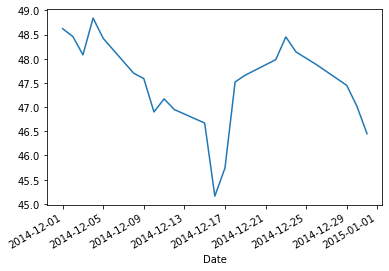

In [ ]:
# Мы можем строить обычный график для одного или нескольких столбцов (просто вызвав plot())
omh.MSFT.plot()


plt.show()

график цены акции Microsoft

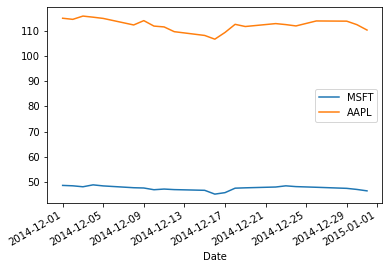

In [ ]:
omh.plot()

цена акций microsoft и apple на одном графике

In [ ]:
# plot, как и другие функции отрисовки возвращают axis -- некоторая переменная, 
# которая может позволить более тонко настроить графики
# Давайте настроим легенду, заголовок, пределы отображения и подписи


* размер 

увеличиваем размер графика

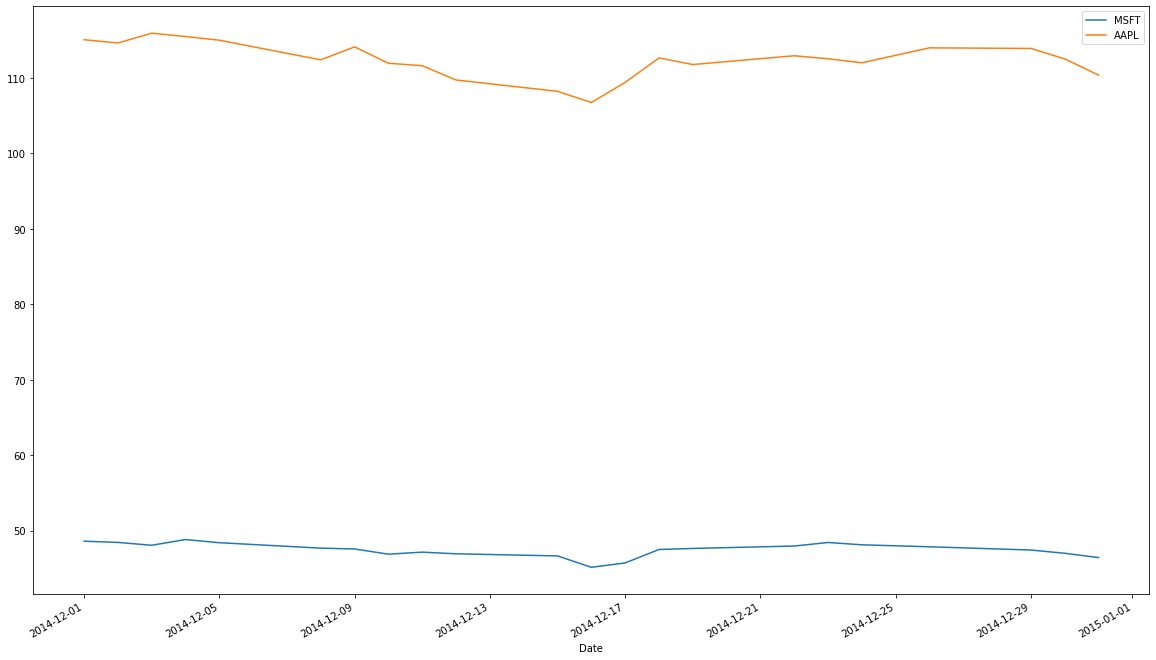

In [ ]:
omh.plot(figsize=(20, 12))

* заголовок / подписи

- заголовок задаем с помощью параметра title метода .plot()
- после вызова метода .plot() явно задаем подписи осей x и y

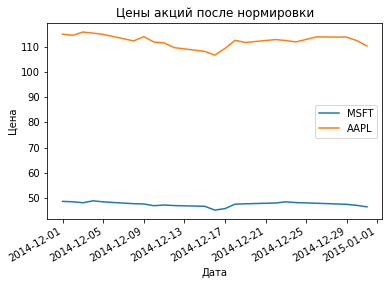

In [ ]:
omh.plot(title='Цены акций после нормировки')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

* легенда

изменяем элементы легенды, соответствующие именам столбцов датафрейма

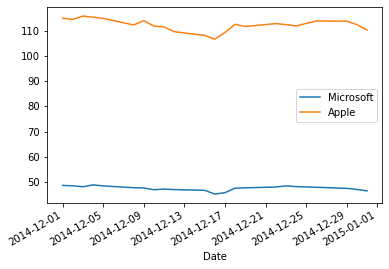

In [ ]:
ax = omh.plot()
ax.legend(['Microsoft', 'Apple'])

изменяем расположение легенды

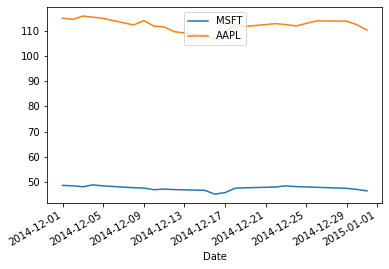

In [ ]:
ax = omh.plot()
ax.legend(loc='upper center')

отключаем легенду с помощью legend=False

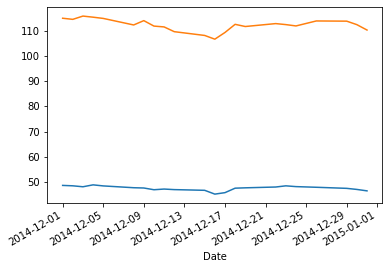

In [ ]:
omh.plot(legend=False)

* цвет / стиль / толщина / маркер

меняем цвета линий графика  
[односимвольные коды](https://matplotlib.org/2.0.2/api/colors_api.html)  
[шестнадцатеричный RGB-код](https://www.rapidtables.com/web/color/RGB_Color.html)

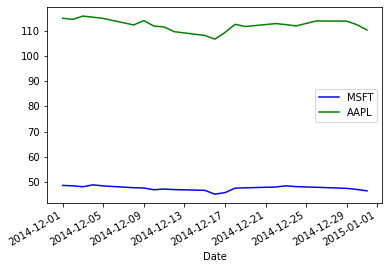

In [ ]:
omh.plot(style={'MSFT': '#0000FF', 'AAPL': 'g'}) 

- [различные стили линий](https://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot)  
- увеличиваем толщину линий

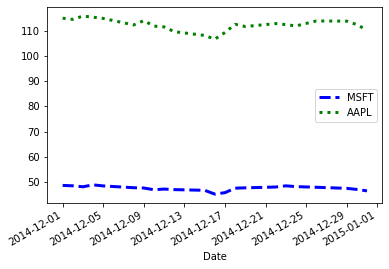

In [ ]:
omh.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3)

рисуем заново, добавив [маркеры](https://matplotlib.org/api/markers_api.html) линий

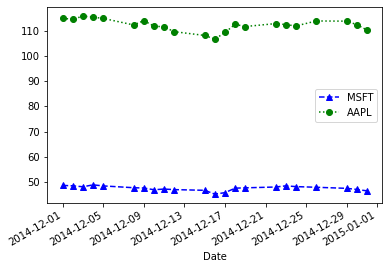

In [ ]:
omh.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'})

### Давайте построим столбчатую диаграмму

In [ ]:
sp500 = pd.read_csv("./sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
ABBV,Health Care,53.95,3.02,2.954,85.784
ACN,Information Technology,79.79,2.34,8.326,50.513
ACE,Financials,102.91,2.21,86.897,34.753
...,...,...,...,...,...
YHOO,Information Technology,35.02,NaN,12.768,35.258
YUM,Consumer Discretionary,74.77,1.93,5.147,33.002
ZMH,Health Care,101.84,0.81,37.181,17.091


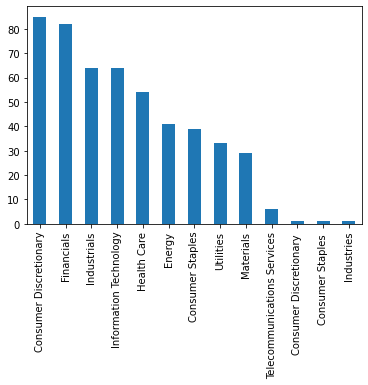

In [ ]:
# Сделать это можно все в том же методе plot, то указав явно kind='bar', 
# также давйте поймем зачем нужны параметры x и y
s = sp500.Sector.value_counts()
s.plot(kind='bar')

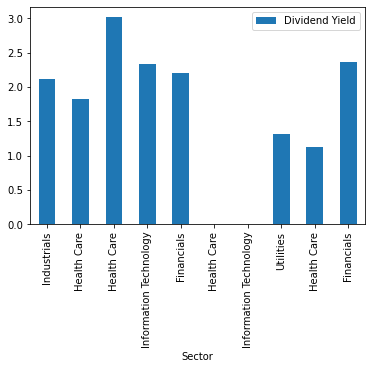

In [ ]:
sp500[:10].plot(y='Dividend Yield', x ='Sector', kind='bar')
plt.show()

In [ ]:
mean_price = sp500.groupby(by='Sector')['Price'].agg(['mean', 'median'])

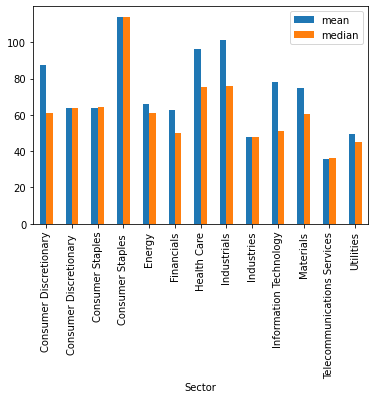

In [ ]:
mean_price.plot(kind='bar')

In [ ]:
# Также полезный параметр stacked

вертикальная состыкованная столбчатая диаграмма

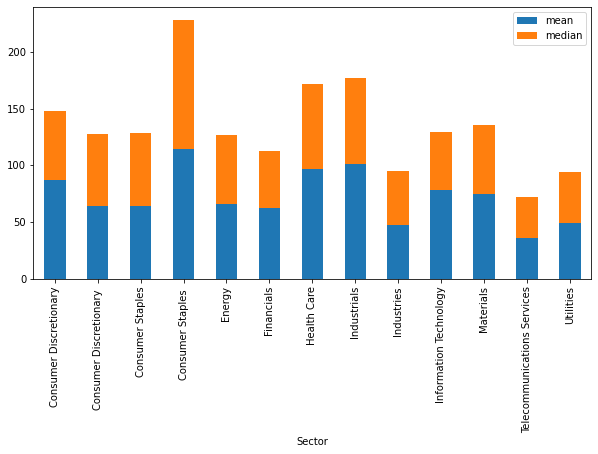

In [ ]:
mean_price.plot(kind='bar', stacked=True, figsize=(10, 5));

горизонтальная состыкованная столбиковая диаграмма

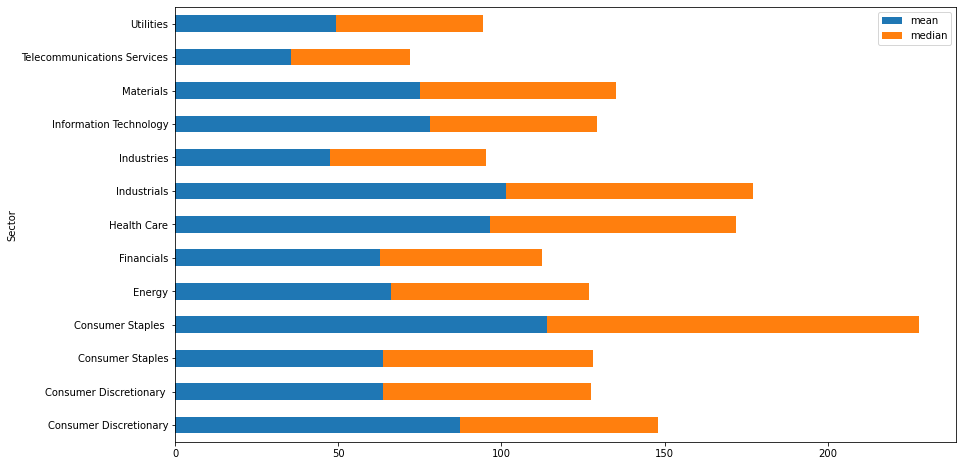

In [ ]:
mean_price.plot(kind='barh', stacked=True, figsize=(14, 8));

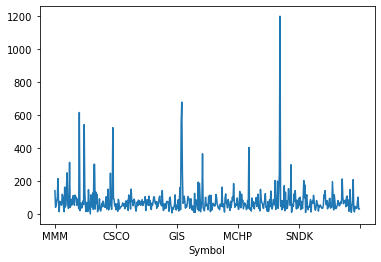

In [ ]:
# Кроме того, можно сделать один столбец индексами и построить столбцы по нему
sp500['Price'].plot()

In [ ]:
sp500.set_index('Sector')

,Price,Dividend Yield,Book Value,Market Cap
Sector,,,,
Industrials,141.14,2.12,26.668,92.345
Health Care,39.60,1.82,15.573,59.477
Health Care,53.95,3.02,2.954,85.784
Information Technology,79.79,2.34,8.326,50.513
Financials,102.91,2.21,86.897,34.753
...,...,...,...,...
Information Technology,35.02,NaN,12.768,35.258
Consumer Discretionary,74.77,1.93,5.147,33.002
Health Care,101.84,0.81,37.181,17.091


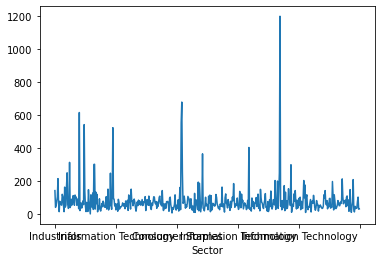

In [ ]:
sp500.set_index('Sector')['Price'].plot()

### Также неплохо может визуализировать данные круговая диаграмма

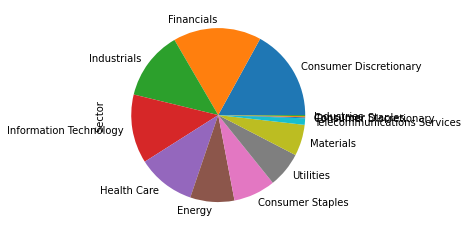

In [ ]:
# Построить ее можно при помощи plot(kind='pie')
s = sp500.Sector.value_counts()
s.plot(kind='pie')

In [ ]:
# Можно добавлять свои подписи. 

In [ ]:
def label_function(val):
    return f'{val:.0f}%({val / sum(s):.3f})'

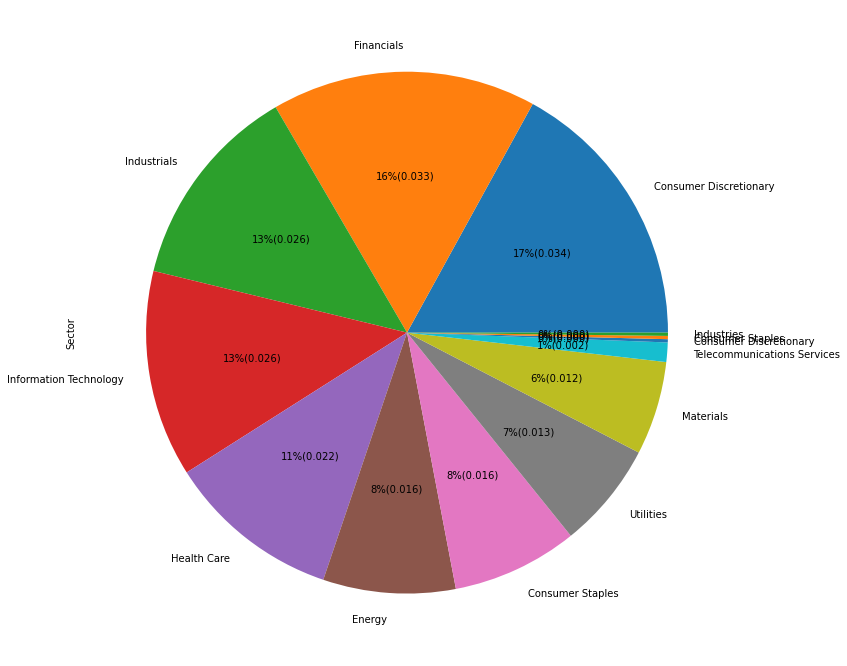

In [ ]:
s.plot(kind='pie', autopct=label_function,figsize=(20, 12))

### Один из самых полезных графиков, которые вы будете строить является гистограмма

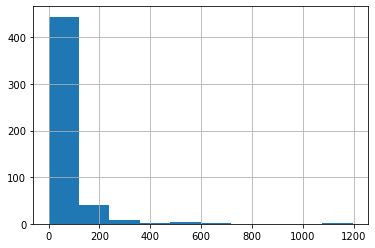

In [ ]:
# pandas посзволяет ее строить при помощи метода hist, где главный параметр bins отвечает за разбиение на корзинки
sp500.Price.hist()
plt.show()

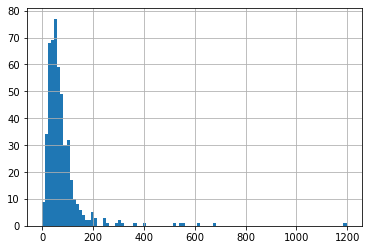

In [ ]:
sp500.Price.hist(bins = 100)

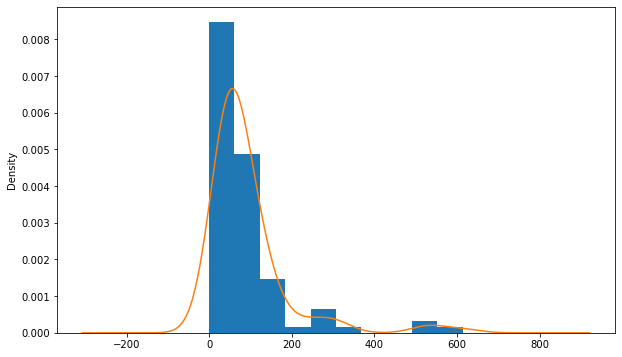

In [ ]:
# Сглаженную гистограмму можно построить при помощи plot(kind='kde')
sp500[:100].Price.hist(density=True)
sp500[:100].Price.plot(kind='kde', figsize=(10,6))

In [ ]:
sp500_c = sp500[(sp500.Price < 130) & (sp500['Book Value'] < 66)]

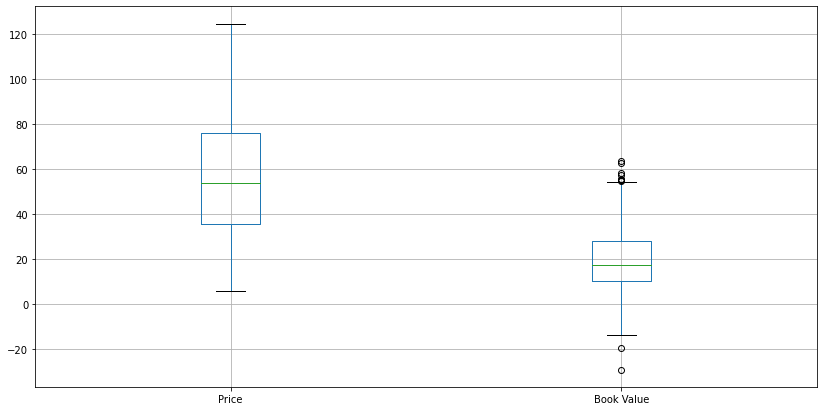

In [ ]:
# Мы также можем отрисовать уже знакомый нам ящик с усами методом boxplot()
sp500_c[['Price','Book Value']].boxplot(figsize = (14, 7))

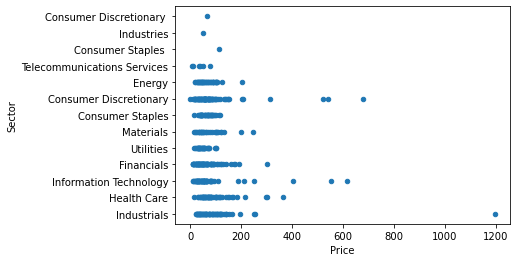

In [ ]:
# Также можно рисовать разброс точек методами pandas
# plot(kind='scatter', x=COL1, y=COL2)
sp500.plot(kind='scatter', x = 'Price', y = 'Sector')
plt.savefig('picture.png') #сохранение картинки

In [ ]:
# Самый простой способ посмотреть на наличие зависимости между столбцами -- посчитать корреляцию
# Но если у вас много столбцов и вы хотите посмотреть корреляции между всеми -- отличной визуализацией будет тепловая карта

# Получим матрицу коррелции

sp500.corr()

,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.202425,0.026821,0.264305
Dividend Yield,-0.202425,1.000000,-0.094558,0.042793
Book Value,0.026821,-0.094558,1.000000,-0.028064
Market Cap,0.264305,0.042793,-0.028064,1.000000


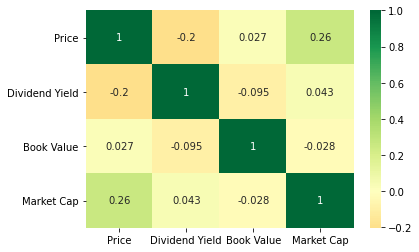

In [ ]:
# Построим тепловую карту

import seaborn as sns

sns.heatmap(sp500.corr(), 
            xticklabels=sp500.corr().columns, 
            yticklabels=sp500.corr().columns, 
            cmap='RdYlGn', 
            center=0, 
            annot=True)

In [ ]:
# heat map
corr_matrix = sp500.corr()
corr_matrix

,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.202425,0.026821,0.264305
Dividend Yield,-0.202425,1.000000,-0.094558,0.042793
Book Value,0.026821,-0.094558,1.000000,-0.028064
Market Cap,0.264305,0.042793,-0.028064,1.000000


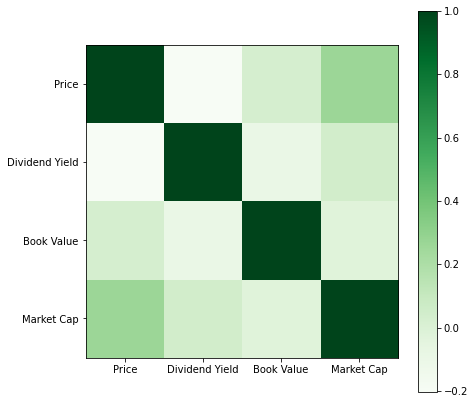

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);


In [ ]:
# Воспользуемся статистическим тестом стьюдента (scipy.stats.ttest_ind)

In [ ]:
df = pd.DataFrame({'method': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 'score': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,
 84, 88, 88, 89, 90, 90, 91]})
df

,method,score
0,A,71
1,A,72
2,A,72
3,A,75
4,A,78
5,A,81
6,A,82
7,A,83
8,A,89
9,A,91


Независимый двухвыборочный t-критерий используется, чтобы определить, равны ли два средних значения совокупности.

Например, предположим, что профессор хочет знать, приводят ли два разных метода обучения к разным средним баллам на экзаменах.

Чтобы проверить это, он набирает 10 студентов для использования метода А и 10 студентов для использования метода Б.


In [ ]:
# определим группы
group1 = df[df['method']=='A']
group2 = df[df['method']=='B']

In [ ]:
#Независимый двухвыборочный t-тест

from scipy.stats import ttest_ind

ttest_ind(group1['score'], group2['score'])

Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.017969284594810425)

Из вывода мы видим:

t тестовая статистика: – 2,6034
р-значение: 0,0179
Поскольку p-значение меньше 0,05, мы отклоняем нулевую гипотезу t-критерия и делаем вывод, что имеется достаточно доказательств того, что два метода приводят к разным средним баллам за экзамен.

Стьюдент-критерий Уэлча аналогичен независимому t-тесту для двух выборок, за исключением того, что он не предполагает, что две совокупности, из которых взяты выборки, имеют одинаковую дисперсию .

Чтобы выполнить t-критерий Уэлча для того же набора данных, что и в предыдущем примере, нам просто нужно указать equal_var=False в функции ttest_ind () следующим образом:

In [ ]:
# t-критерий Уэлча
ttest_ind(group1['score'], group2['score'], equal_var= False )


Ttest_indResult(statistic=-2.603430460539794, pvalue=0.02014688617423973)

Из вывода мы видим:

t тестовая статистика: – 2,6034
p-значение: 0,0201
Поскольку p-значение меньше 0,05, мы отклоняем нулевую гипотезу t-критерия Уэлча и делаем вывод, что имеется достаточно доказательств того, что эти два метода приводят к разным средним экзаменационным баллам.

## Подведем итог того, что мы узнали

1. **Узнали:** Как проводить первичный анализ данных при помощи инструментов pandas  
    **Как будем использовать:** При решении задачи машинного обучения -- этап первичного анализа данных является очень важным, поскольку позволяет найти проблемы в данных и выдвинуть гипотезы, которые позже будут проверены.
2. **Узнали:** Познакомились с новыми видами графиков  
    **Как будем использовать:** Такие графики, как гистограмма, не только информативно описывают ваши данные, но и позволяют их добавлять в презентации работ, чтобы наглядно показать ваши результаты.

## Бонус

### Как обновить пандас и узнать версию

In [ ]:
!pip install --upgrade pandas

In [ ]:
pd.__version__ # 1.3.5

### Как загрузить файл на колаб?


1. Загрузить локально с компьютера:
Нажмите на кнопку "Выбрать файл" и выберете файл из локальной системы компьютера

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls

2. Загрузить локально с компьютера, нажать на кнопку загрузки в левом углу меню "Файлы"

3. Загрузить файл с гугл-диска 

- Загружаем файл к себе на диск
- Получаем доступ к диску, запуская данный код
- Код генерирует ссылку, чтобы авторизоваться в гугл диске с вашим аккаунтом, нажимаете на нее, авторизуетесь, копируете там код и вставляете в колаб

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- появляется папка drive/MyDrive - это вход на ваш гугл диск 

In [ ]:
!ls

- далее можно загружать файл по пути до файла, начиная с ``drive/MyDrive/``

In [ ]:
df = pd.read_csv('drive/MyDrive/adult_data.csv')

In [ ]:
df.head()

### Как загрузить файл excel?

In [ ]:
pd.read_excel('./file.xlsx', sheet_name='Sheet1')

In [ ]:
pd.to_csv('file.')

### Сводные таблицы ([pivot table](http://datareview.info/article/svodnyie-tablitsyi-v-python/))

Возможность создавать сводные таблицы присутствует в электронных таблицах и других программах, оперирующих табличными данными. Сводная таблица принимает на входе данные из отдельных столбцов и группирует их, формируя двумерную таблицу, реализующую многомерное обобщение данных. Чтобы ощутить разницу между сводной таблицей и операцией GroupBy, можно представить себе сводную таблицу, как многомерный вариант агрегации посредством GroupBy. То есть данные разделяются, преобразуются и объединяются, но при этом разделение и объединение осуществляются не по одномерному индексу, а по двумерной сетке.

In [ ]:
df = pd.DataFrame({"a": [1,2,3,1,2,3], "b":[1,1,1,2,2,2], "c":np.random.rand(6)})
df

,a,b,c
0,1,1,0.780538
1,2,1,0.365038
2,3,1,0.177284
3,1,2,0.477769
4,2,2,0.728170
5,3,2,0.326267


In [ ]:
pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)['c']

b,1,2
a,,
1,0.780538,0.477769
2,0.365038,0.728170
3,0.177284,0.326267


In [ ]:
df.groupby(['a','b'])['c'].sum()

a  b
1  1    0.780538
   2    0.477769
2  1    0.365038
   2    0.728170
3  1    0.177284
   2    0.326267
Name: c, dtype: float64

In [ ]:
df = pd.DataFrame({
                   'area': np.random.randint(20, 300, 30),
                   'sqm_price': np.random.randint(1000, 10000, 30),
                   'pay_type': np.random.choice(['monthly', 'annual'], 30),
                  'size_type' : np.random.choice(['sotka', 'hectare', 'sqm'], 30)
                  })

In [ ]:
df.head()

,area,sqm_price,pay_type,size_type
0,196,3803,monthly,sqm
1,45,9383,annual,sotka
2,118,5413,annual,sqm
3,259,1443,monthly,sqm
4,281,8017,monthly,hectare


In [ ]:
df['price_all'] = df['sqm_price'] * df['area']
df.head()

,area,sqm_price,pay_type,size_type,price_all
0,196,3803,monthly,sqm,745388
1,45,9383,annual,sotka,422235
2,118,5413,annual,sqm,638734
3,259,1443,monthly,sqm,373737
4,281,8017,monthly,hectare,2252777


In [ ]:
# pivot(values, index, columns, margins)

Есть следующие параметры
- values значения для агрегации
- index строковый индекс (одна из колонок для группировки)
- columns колоночный индекс (одна из колонок для группировки)
- aggfunc аггрегационная функция

In [ ]:
pd.pivot_table(df, index=['pay_type', 'size_type'], values=['sqm_price','price_all'], aggfunc=['count'])

count          
                   price_all sqm_price
pay_type size_type                    
annual   hectare           7         7
         sotka             6         6
         sqm               3         3
monthly  hectare           4         4
         sotka             3         3
         sqm               7         7

margins дает нам дополнительную сводку по всем группам

In [ ]:
pd.pivot_table(
               df, 
               index=['pay_type', 'size_type'], 
               values=['sqm_price','price_all'], 
               aggfunc=[ 'count'], 
               margins=True,
              )

count          
                   price_all sqm_price
pay_type size_type                    
annual   hectare           7         7
         sotka             6         6
         sqm               3         3
monthly  hectare           4         4
         sotka             3         3
         sqm               7         7
All                       30        30

In [ ]:
pd.pivot_table(df,
               index=['pay_type', 'size_type'],
               values=['sqm_price','price_all'],
               aggfunc=['mean', 'count'],
               margins=True)

mean                  count          
                       price_all    sqm_price price_all sqm_price
pay_type size_type                                               
annual   hectare    7.640401e+05  5577.571429         7         7
         sotka      1.160151e+06  5950.833333         6         6
         sqm        3.928423e+05  3042.666667         3         3
monthly  hectare    1.291256e+06  6019.000000         4         4
         sotka      1.032324e+06  6572.666667         3         3
         sqm        6.692489e+05  4168.714286         7         7
All                 8.811484e+05  5228.366667        30        30